<a href="https://colab.research.google.com/github/SYongho/Estimated-LH-PG-in-horizontal-pipe/blob/10-Inputs/LH_PG_feature_select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression

# Data split

In [17]:
prepared_data = pd.read_csv('prepared_data.csv')

csv_inp = prepared_data.iloc[:, :10]
csv_out_LH = prepared_data.iloc[:, [10]]
csv_out_PG = prepared_data.iloc[:, [11]]

train_inp, val_inp, train_out_LH, val_out_LH = train_test_split(csv_inp, csv_out_LH, test_size=0.2, random_state=38)
train_inp, test_inp, train_out_LH, test_out_LH = train_test_split(train_inp, train_out_LH, test_size=0.2, random_state=38)
train_inp, val_inp, train_out_PG, val_out_PG = train_test_split(csv_inp, csv_out_PG, test_size=0.2, random_state=38)
train_inp, test_inp, train_out_PG, test_out_PG = train_test_split(train_inp, train_out_PG, test_size=0.2, random_state=38)

In [20]:
select_ETR = RFE(ExtraTreesRegressor(random_state=38), n_features_to_select=10)
fit = select_ETR.fit(train_inp, train_out_LH)
train_inp_rfe = select_ETR.fit_transform(train_inp, train_out_LH)
test_inp_rfe = select_ETR.transform(test_inp)
print('Num Features_LH: {}'.format(fit.n_features_))
print('Selected Features_LH: {}'.format(fit.support_))
print('Feature Ranking_LH: {}'.format(fit.ranking_))

select_ETR = RFE(ExtraTreesRegressor(random_state=38), n_features_to_select=10)
fit = select_ETR.fit(train_inp, train_out_PG)
train_inp_rfe = select_ETR.fit_transform(train_inp, train_out_PG)
test_inp_rfe = select_ETR.transform(test_inp)
print('Num Features_PG: {}'.format(fit.n_features_))
print('Selected Features_PG: {}'.format(fit.support_))
print('Feature Ranking_PG: {}'.format(fit.ranking_))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features_LH: 10
Selected Features_LH: [ True  True  True  True  True  True  True  True  True  True]
Feature Ranking_LH: [1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features_PG: 10
Selected Features_PG: [ True  True  True  True  True  True  True  True  True  True]
Feature Ranking_PG: [1 1 1 1 1 1 1 1 1 1]


In [21]:
select_RFR = RFE(RandomForestRegressor(n_estimators=100, random_state=38), n_features_to_select=10)
fit = select_RFR.fit(train_inp, train_out_LH)
train_inp_rfe = select_RFR.fit_transform(train_inp, train_out_LH)
test_inp_rfe = select_RFR.transform(test_inp)
print('Num Features_LH: {}'.format(fit.n_features_))
print('Selected Features_LH: {}'.format(fit.support_))
print('Feature Ranking_LH: {}'.format(fit.ranking_))

select_RFR = RFE(RandomForestRegressor(n_estimators=100, random_state=38), n_features_to_select=10)
fit = select_RFR.fit(train_inp, train_out_PG)
train_inp_rfe = select_RFR.fit_transform(train_inp, train_out_PG)
test_inp_rfe = select_RFR.transform(test_inp)
print('Num Features_PG: {}'.format(fit.n_features_))
print('Selected Features_PG: {}'.format(fit.support_))
print('Feature Ranking_PG: {}'.format(fit.ranking_))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features_LH: 10
Selected Features_LH: [ True  True  True  True  True  True  True  True  True  True]
Feature Ranking_LH: [1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features_PG: 10
Selected Features_PG: [ True  True  True  True  True  True  True  True  True  True]
Feature Ranking_PG: [1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_from_model.py:222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Text(0.5, 0, 'feature number_PG')

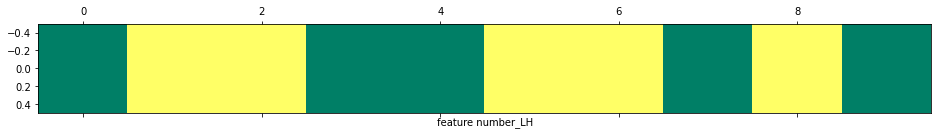

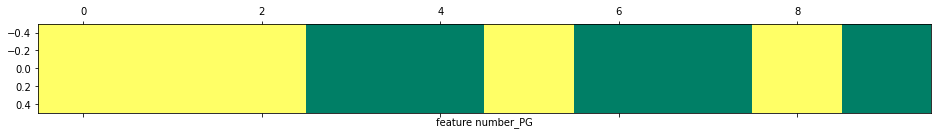

In [22]:
select = SelectFromModel(RandomForestRegressor(n_estimators=80, random_state=38), threshold='median')
select.fit(train_inp, train_out_LH)
train_inp_sl = select.transform(train_inp)
look = select.get_support()
plt.matshow(look.reshape(1, -1), cmap='summer_r')
plt.xlabel('feature number_LH')

select = SelectFromModel(RandomForestRegressor(n_estimators=80, random_state=38), threshold='median')
select.fit(train_inp, train_out_PG)
train_inp_sl = select.transform(train_inp)
look = select.get_support()
plt.matshow(look.reshape(1, -1), cmap='summer_r')
plt.xlabel('feature number_PG')

In [23]:
train_inp

,SystPressureGL,SystTempGL/C,PipeDiaGL,PipeIncliGL,GasSuperficialVelGL,GasDensityGL,GasViscosityGL,Liq1SuperficialVelGL,Liq1DensityGL,Liq1ViscosityGL
471,36900.00,23.20,0.0508,1,16.30,1.63,0.000019,0.01,885.41,0.01
579,28800.00,23.60,0.0508,-2,10.50,1.53,0.000019,0.01,885.13,0.01
122,125396.22,32.39,0.0508,0,0.50,1.43,0.000018,0.50,877.00,0.25
44,174860.49,21.18,0.0508,0,1.01,2.07,0.000018,0.80,883.00,0.58
387,28600.00,22.60,0.0508,-1,4.80,1.53,0.000019,0.05,885.84,0.01
...,...,...,...,...,...,...,...,...,...,...
631,261106.08,22.90,0.0762,-1,4.93,3.07,0.000018,0.05,858.11,0.01
373,36200.00,23.00,0.0508,-1,16.10,1.62,0.000019,0.00,885.55,0.01
708,343085.25,21.80,0.0259,-9,1.64,4.05,0.000018,0.06,858.75,0.01
691,257038.14,24.10,0.0513,0,1.94,3.01,0.000018,0.03,857.31,0.01
